# (5주차) 10월5일 -- draft
> seaborn

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

## import 

In [357]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

## [sns scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

`-` data 

In [358]:
np.random.seed(43052)
eps = np.random.randn(100)
y = np.cumsum(eps)

In [359]:
eps1 = eps[:-1] # (t-1) 시점
eps2 = eps[1:] # t 시점 

In [360]:
y1 = y[:-1] # (t-1) 시점 
y2 = y[1:] # t 시점

### plt 복습 

`-` 예시1

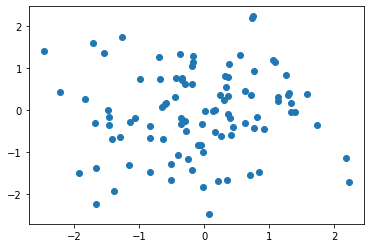

In [361]:
plt.plot(eps1,eps2,'o')

In [362]:
np.corrcoef(eps1,eps2) # np.corrcoef([ϵ1,ϵ2])

array([[1.        , 0.05289696],
       [0.05289696, 1.        ]])

`-` 예시2

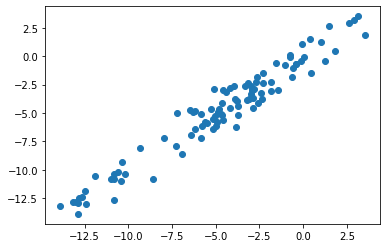

In [363]:
plt.plot(y1,y2,'o')

In [364]:
np.corrcoef(y1,y2)

array([[1.        , 0.97237553],
       [0.97237553, 1.        ]])

### sns: array

<AxesSubplot:>

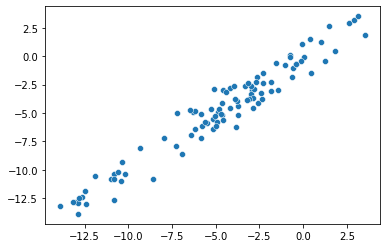

In [365]:
sns.scatterplot(data=None,x=y1,y=y2)

### sns: wide df

`-` 예시1

<AxesSubplot:xlabel='eps1', ylabel='eps2'>

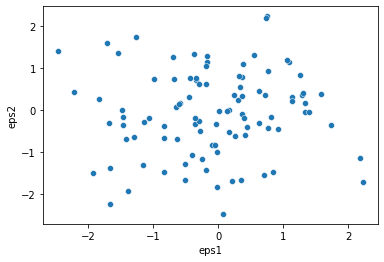

In [366]:
sns.scatterplot(data=pd.DataFrame({'eps1':ϵ1,'eps2':ϵ2}), x='eps1', y='eps2')

`-` 예시2

<AxesSubplot:xlabel='y1', ylabel='y2'>

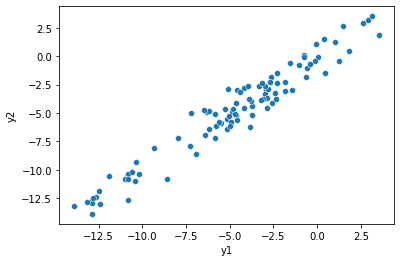

In [367]:
sns.scatterplot(data=pd.DataFrame({'y1':y1,'y2':y2}), x='y1', y='y2')

`-` 예시3

<AxesSubplot:xlabel='eps1', ylabel='eps2'>

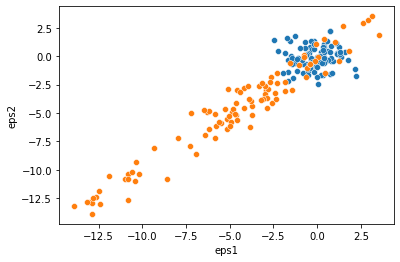

In [368]:
sns.scatterplot(data=pd.DataFrame({'eps1':eps1,'eps2':eps2}), x='eps1', y='eps2')
sns.scatterplot(data=pd.DataFrame({'y1':y1,'y2':y2}), x='y1', y='y2')

### sns: long df

In [369]:
_x = np.concatenate([eps1,y1])
_y = np.concatenate([eps2,y2])
_var = ['eps']*len(eps1)+['y']*len(eps1)

In [370]:
df2= pd.DataFrame({'x':_x,'y':_y,'var':_var})
df2

,x,y,var
0,0.383420,1.084175,eps
1,1.084175,1.142778,eps
2,1.142778,0.307894,eps
3,0.307894,0.237787,eps
4,0.237787,0.355951,eps
...,...,...,...
193,-11.907476,-10.598788,y
194,-10.598788,-10.193412,y
195,-10.193412,-10.378481,y
196,-10.378481,-9.323094,y


`-` 예시1

<AxesSubplot:xlabel='x', ylabel='y'>

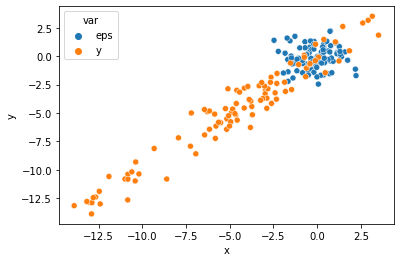

In [371]:
sns.scatterplot(data=df2,x='x',y='y',hue='var')

## seaborn: figure-level vs axes-level

ref: https://seaborn.pydata.org/tutorial/function_overview.html#figure-level-vs-axes-level-functions

### 예제1

`-` 지금까지 살펴본 boxplot, histplot, lineplot, scatterplot 의 공통점 = 액시즈레벨 함수임 (함수의 argument로 ax를 명시할 수 있다) 

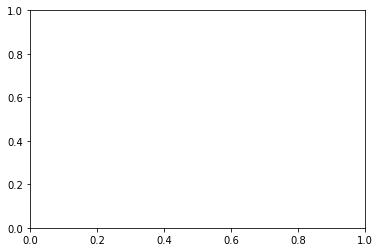

In [372]:
fig,myax = plt.subplots() 

In [373]:
sns.histplot(data=np.random.randn(100), ax=myax) # 우리가 예전에 구현한 g,h 함수 그 느낌이에요!!

<AxesSubplot:ylabel='Count'>

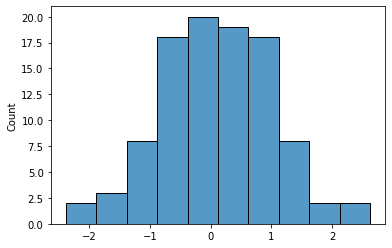

In [374]:
fig

In [375]:
myax.set_ylabel('count',size=20,family='serif',style='italic',weight=700)

Text(17.200000000000003, 0.5, 'count')

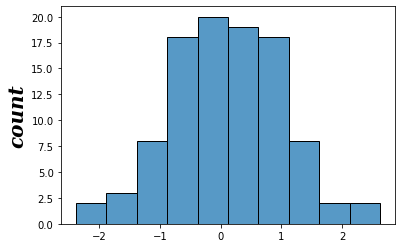

In [376]:
fig

### 예제2

`-` data

In [377]:
import cv2

In [378]:
!wget https://upload.wikimedia.org/wikipedia/commons/0/08/Unequalized_Hawkes_Bay_NZ.jpg
img_before = cv2.imread('Unequalized_Hawkes_Bay_NZ.jpg',0)
!rm Unequalized_Hawkes_Bay_NZ.jpg

--2022-10-05 10:04:06--  https://upload.wikimedia.org/wikipedia/commons/0/08/Unequalized_Hawkes_Bay_NZ.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110895 (108K) [image/jpeg]
Saving to: ‘Unequalized_Hawkes_Bay_NZ.jpg’

Unequalized_Hawkes_ 100%[===================>] 108.30K   531KB/s    in 0.2s    

2022-10-05 10:04:07 (531 KB/s) - ‘Unequalized_Hawkes_Bay_NZ.jpg’ saved [110895/110895]



(for win user)
```python
!pip install wget # 처음한번만 실행

import wget
wget.download('https://upload.wikimedia.org/wikipedia/commons/0/08/Unequalized_Hawkes_Bay_NZ.jpg')
img_before = cv2.imread('Unequalized_Hawkes_Bay_NZ.jpg',0)
```

In [379]:
img_before

array([[127, 145, 149, ..., 168, 167, 166],
       [165, 152, 143, ..., 168, 169, 168],
       [171, 145, 140, ..., 156, 154, 151],
       ...,
       [147, 132, 134, ..., 146, 145, 144],
       [146, 130, 132, ..., 146, 145, 144],
       [145, 128, 129, ..., 146, 145, 144]], dtype=uint8)

In [380]:
img_after = cv2.equalizeHist(img_before)

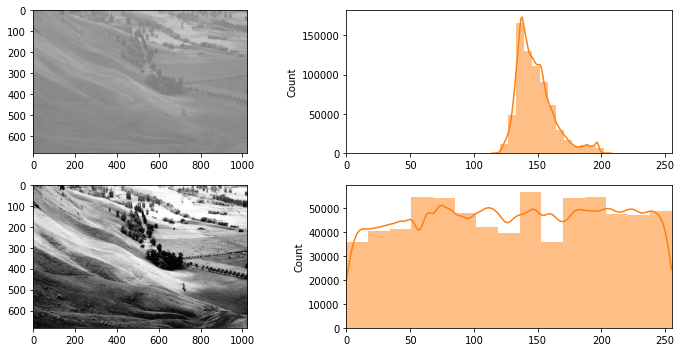

In [381]:
fig, ax = plt.subplots(2,2,figsize=(10,5))
ax[0,0].imshow(img_before,cmap='gray',vmin=0,vmax=255)
sns.histplot(data=img_before.reshape(-1),ax=ax[0,1],bins=15,kde=True,color='C1',lw=0); ax[0,1].set_xlim(0,255)
ax[1,0].imshow(img_after,cmap='gray',vmin=0,vmax=255); 
sns.histplot(data=img_after.reshape(-1),ax=ax[1,1],bins=15,kde=True,color='C1',lw=0); ax[1,1].set_xlim(0,255)
fig.tight_layout()

## mpl 미세먼지팁 (2) 

### 축 간격조정 

In [657]:
import matplotlib as mpl

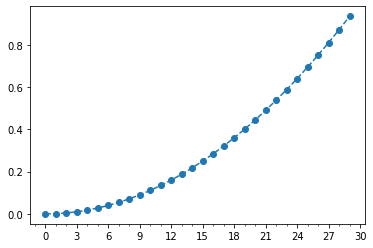

In [658]:
fig, ax = plt.subplots()
ax.plot([(xi/30)**2 for xi in range(30)],'--o')
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(3)) # 큰 눈금간격을 3으로
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1)) # 작은 눈금간격을 1로

### 축 삭제

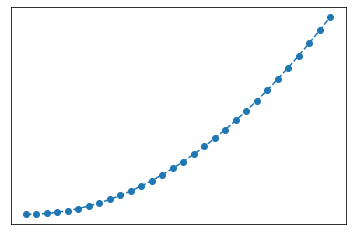

In [659]:
fig, ax = plt.subplots()
ax.plot([(xi/30)**2 for xi in range(30)],'--o')
ax.xaxis.set_major_locator(mpl.ticker.NullLocator()) # x축 눈금삭제
ax.yaxis.set_major_locator(mpl.ticker.NullLocator()) # y축 눈금삭제

### 축 범위조정 

(-5.0, 35.0)

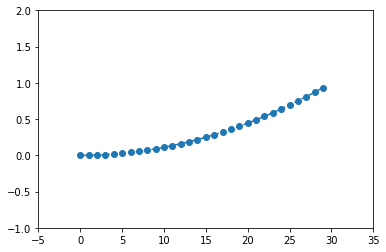

In [660]:
fig, ax = plt.subplots()
ax.plot([(xi/30)**2 for xi in range(30)],'--o')
ax.set_ylim(-1,2) 
ax.set_xlim(-5,35)
# plt.ylim(-1,2)
# plt.xlim(-5,35)

### gcf, gca

`-` gcf

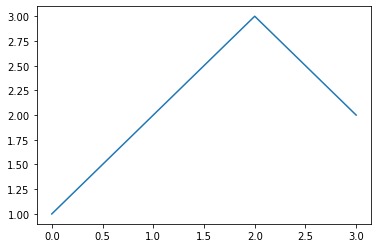

In [386]:
plt.plot([1,2,3,2])
fig = plt.gcf()

In [387]:
fig.suptitle('suptitle')

Text(0.5, 0.98, 'suptitle')

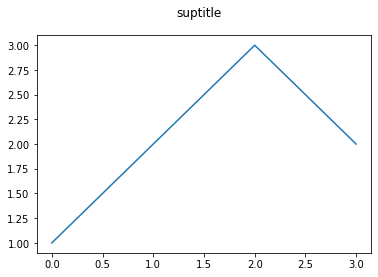

In [388]:
fig

`-` gca

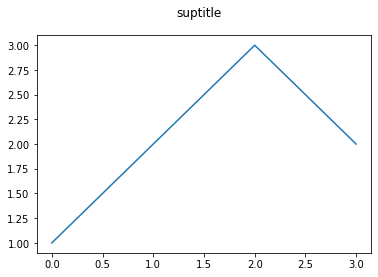

In [389]:
fig

In [390]:
ax = fig.gca()

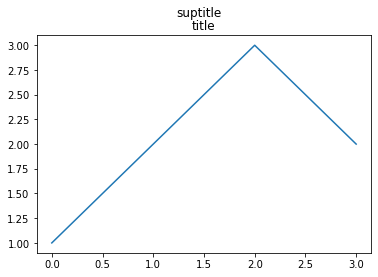

In [391]:
ax.set_title('title') 
fig

### fig.subplots() 

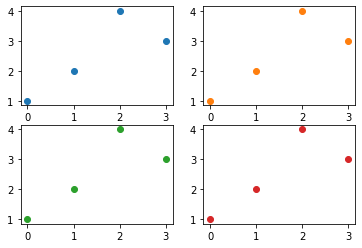

In [585]:
fig,ax = plt.subplots(2,2)
ax[0,0].plot([1,2,4,3],'o',color='C0')
ax[0,1].plot([1,2,4,3],'o',color='C1')
ax[1,0].plot([1,2,4,3],'o',color='C2')
ax[1,1].plot([1,2,4,3],'o',color='C3')

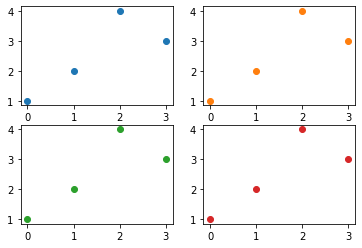

In [586]:
fig = plt.figure()
ax = fig.subplots(2,2)
ax[0,0].plot([1,2,4,3],'o',color='C0')
ax[0,1].plot([1,2,4,3],'o',color='C1')
ax[1,0].plot([1,2,4,3],'o',color='C2')
ax[1,1].plot([1,2,4,3],'o',color='C3')

### plt.subplot

- 끝에 s가 없어요!!

`-` 기능1: 몰라도 됩니당.. (아마도)

`-` 기능2: 특이해요.. fig를 안받아도 무방함

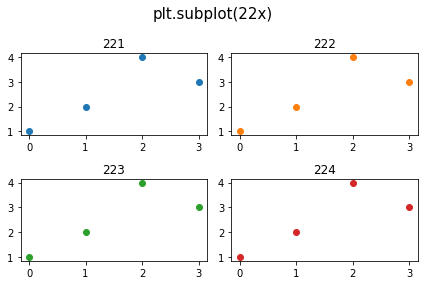

In [576]:
ax1 = plt.subplot(221) 
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

ax1.plot([1,2,4,3],'o',color='C0');ax1.set_title('221')
ax2.plot([1,2,4,3],'o',color='C1');ax2.set_title('222')
ax3.plot([1,2,4,3],'o',color='C2');ax3.set_title('223')
ax4.plot([1,2,4,3],'o',color='C3');ax4.set_title('224')

fig=plt.gcf()
fig.suptitle("plt.subplot(22x)",size=15)
fig.tight_layout()

위는 아래와 같은 코드임 

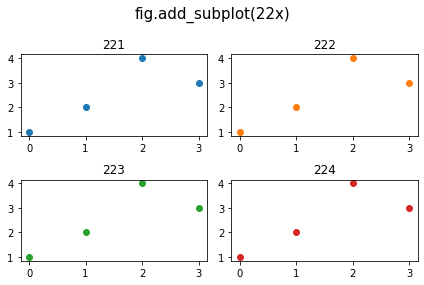

In [577]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.plot([1,2,4,3],'o',color='C0');ax1.set_title('221')
ax2.plot([1,2,4,3],'o',color='C1');ax2.set_title('222')
ax3.plot([1,2,4,3],'o',color='C2');ax3.set_title('223')
ax4.plot([1,2,4,3],'o',color='C3');ax4.set_title('224')

fig.tight_layout()
fig.suptitle("fig.add_subplot(22x)",size=15)
fig.tight_layout()

`-` fig.add_subplot() vs fig.add_axes() 
- fig.add_subplot(): 입력으로 nrows, ncols, index 전달 (편하게 쓰기엔 좋아)
- fig.add_axes(): 입력으로 left, bottom, width, height 전달 (이상한 그래프 만들기 좋아)

`-` plt.subplots() vs plt.subplot() 
- plt.subplots(): 넣을 수 있는 액시즈 종류가 한가지 
- plt.subplot(): 여러 (특이한) 액시즈를 넣을 수 있음 

(기본액시즈)

<AxesSubplot:>

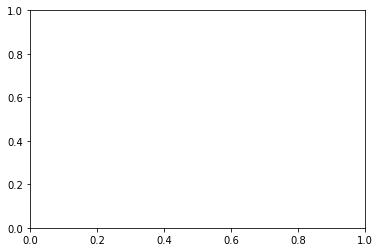

In [544]:
plt.subplot(111,projection=None)

(3d 액시즈)

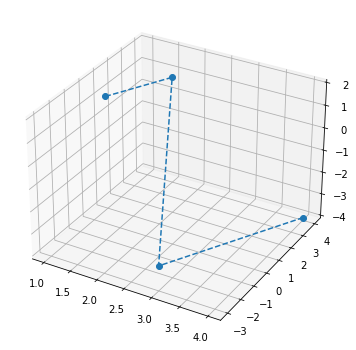

In [569]:
ax=plt.subplot(111,projection='3d')
ax.plot([1,2,3,4],[1,2,-3,4],[1,2,-3,-4],'--o')
fig=plt.gcf()
fig.set_figheight(12)

(polar 액시즈)

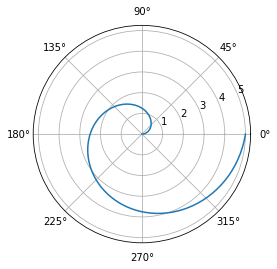

In [555]:
ax=plt.subplot(111,projection='polar')
r = np.linspace(0,5,100)
theta = np.linspace(0,2*np.pi,100)
ax.plot(theta,r)

### Latex 

`-` 예시1

Text(0.5, 1.0, '$y_1=(x_1-1)^2$')

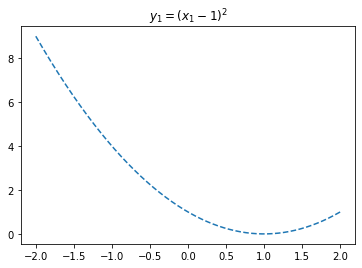

In [648]:
x1= np.linspace(-2,2,1000)
y1= (x1-1)**2 
fig, ax = plt.subplots()
ax.plot(x1,y1,'--')
ax.set_title('$y_1=(x_1-1)^2$')

`-` 예시2

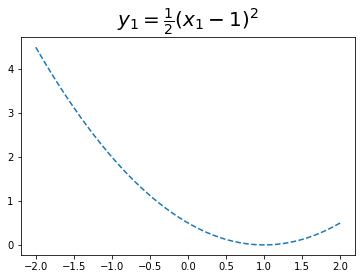

In [649]:
x1 = np.linspace(-2,2,1000)
y1 = 0.5*(x1-1)**2 
fig, ax = plt.subplots()
ax.plot(x1,y1,'--')
ax.set_title(r'$y_1=\frac{1}{2}(x_1-1)^2$',size=20);

`-` 예시3

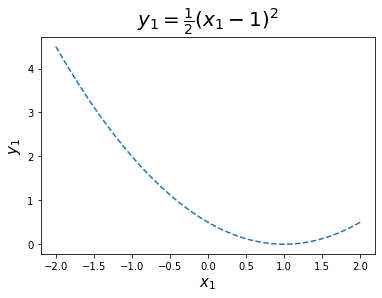

In [652]:
x1 = np.linspace(-2,2,1000)
y1 = 0.5*(x1-1)**2 
fig, ax = plt.subplots()
ax.plot(x1,y1,'--')
ax.set_title(r'$y_1=\frac{1}{2}(x_1-1)^2$',size=20)
ax.set_xlabel(r'$x_1$',size=15)
ax.set_ylabel(r'$y_1$',size=15);

`-` 예시4

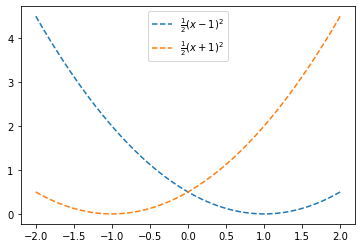

In [656]:
x1 = np.linspace(-2,2,1000)
y1 = 0.5*(x1-1)**2 
y2 = 0.5*(x1+1)**2
fig, ax = plt.subplots()
ax.plot(x1,y1,'--',label=r'$\frac{1}{2}(x-1)^2$')
ax.plot(x1,y2,'--',label=r'$\frac{1}{2}(x+1)^2$')
ax.legend()